In [4]:
import pandas as pd
from surprise import Dataset, Reader, SVDpp, SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import BaselineOnly
import numpy as np

In [2]:
	
pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 30)

In [3]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195838 sha256=cf34f88544e5f790197454053adfb9701c8e2b58dbea192ca7f936da1829af2c
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_df = pd.read_parquet('/content/drive/MyDrive/хакатон_работа_ру/train_mfti.parquet')

In [7]:
test_df = pd.read_parquet('/content/drive/MyDrive/хакатон_работа_ру/test_public_mfti.parquet')
test_df  

,cookie_id,vacancy_id_
0,000cd76cd33f43d4a1ac1d16d10f8bf7,"[222177, 222173, 222163, 238874, 238878, 22812..."
1,0034bc7f404341ba8412665453e7825a,"[102794, 137587, 257319, 237756, 240744, 11348..."
2,00a6c5a64a274c55a836402bdeb3b2c4,"[254292, 164602, 116438, 228634, 218819, 24065..."
3,015937a125b14e74bdff1cddc49f9172,"[246685, 138123, 115420, 210628, 212325, 235196]"
4,01de50c280794cec8804f16f45f847b7,"[219070, 251469, 166899, 212703, 214561]"
...,...,...
767,fdbcda17f22f406486837059e76c7fed,"[207851, 254989, 213344, 214180, 222146]"
768,fe6193ab26494ace9be5aae36e507618,"[115352, 230546, 225527, 120188, 109360, 23212..."
769,fe95b2826ee1452b81201ed3f4c3294d,"[240362, 114852, 253946, 251081, 127546, 244688]"
770,ff1aef256a49481698bb2e938510ff36,"[231194, 236363, 220747, 244688, 100094, 24052..."


<Axes: xlabel='event_date'>

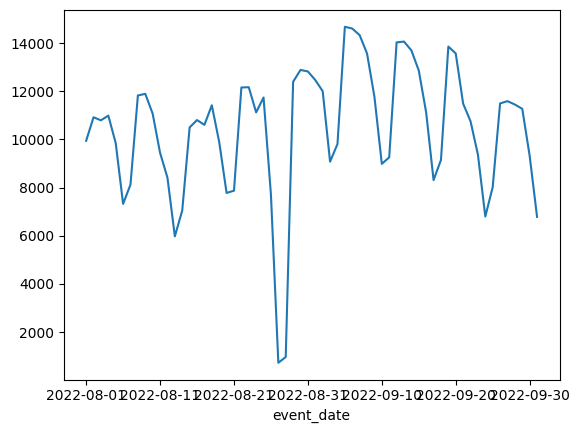

In [63]:
#активные User_id по дням
train_df.groupby('event_date') \
           .user_id.nunique().plot()

In [64]:
train_df.groupby('event_date') \
           .user_id.nunique().sort_values()

event_date
2022-08-27      726
2022-08-28      966
2022-08-13     5976
2022-10-01     6786
2022-09-24     6799
              ...  
2022-09-12    14029
2022-09-13    14064
2022-09-07    14331
2022-09-06    14604
2022-09-05    14678
Name: user_id, Length: 62, dtype: int64

In [7]:
test_df_sub = pd.read_parquet('/content/drive/MyDrive/хакатон_работа_ру/test_private_sample_submission_mfti.parquet')
test_df_sub

,cookie_id,predictions
0,0018914ba3e54011b28fa715583d3354,"[100100, 100101, 100102, 100103, 100104]"
1,0035c298d8c64f368ae730a9cca9bb20,"[100100, 100101, 100102, 100103, 100104]"
2,00956458877448ec9fba87fb97443fdf,"[100100, 100101, 100102, 100103, 100104]"
3,0099387c921b41e7bae6c99dd8254b60,"[100100, 100101, 100102, 100103, 100104]"
4,009f65e8ae99413a8da94a491320580a,"[100100, 100101, 100102, 100103, 100104]"
...,...,...
3081,ffadd195859444d2ade2479b0611c5c1,"[100100, 100101, 100102, 100103, 100104]"
3082,ffbc08b528c64f22996873fc63872202,"[100100, 100101, 100102, 100103, 100104]"
3083,ffdeaf3c34544529880aebf17c103f6c,"[100100, 100101, 100102, 100103, 100104]"
3084,ffefa79a74804ee69e6c131e0d05b948,"[100100, 100101, 100102, 100103, 100104]"


In [2]:
train_df

NameError: ignored

In [8]:
# добавим столбец с числовой интерпритацией каждого действия на основе event_type:
train_df['event_type_numeric'] = train_df['event_type'].map({'show_vacancy': 1, 'preview_click_vacancy': 2, 'click_response': 3, \
                                                          'preview_click_response': 4, 'click_favorite': 5, 'preview_click_favorite': 6,\
                                                          'click_contacts': 7, 'preview_click_contacts': 8, 'click_phone': 9, 'preview_click_phone': 10,              })
train_df

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,event_type_numeric
0,2022-08-01,1659323026,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy,1
1,2022-08-01,1659377255,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1
2,2022-08-01,1659376695,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1
3,2022-08-01,1659376722,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1
4,2022-08-01,1659374929,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1
...,...,...,...,...,...,...,...
12292583,2022-08-11,1660246479,162851,0d3c58c6864546c689fa0997de484b30,18124998fd644e80b667a1d84bf63846,preview_click_response,4
12292584,2022-08-11,1660246106,136818,ef559274a81e4ff4b92aa3e9f6805886,5c71c1f1b7cf492ba05871c400a05250,preview_click_response,4
12292585,2022-08-11,1660250139,143721,c4453128ae584dca8f2a8d20a7c74263,33c968125459420e89ffbc8cffece317,preview_click_response,4
12292586,2022-08-11,1660250318,154423,c4453128ae584dca8f2a8d20a7c74263,33c968125459420e89ffbc8cffece317,preview_click_response,4


In [9]:
#вычислим рейтинг каждой для каждой вакансии на основе отношения релевантных действий к суммарным показам вакансии:
show_act = train_df.query('event_type_numeric  ==1').groupby('vacancy_id_') \
           ['event_type_numeric'].count()
rel_act = train_df.query('event_type_numeric >2' or 'event_type_numeric <5' or 'event_type_numeric >6').groupby('vacancy_id_') \
           ['event_type_numeric'].count()

In [7]:
rating = rel_act/show_act
rating

vacancy_id_
100001    0.304348
100002    0.245370
100003    0.107143
100004         NaN
100005    0.200000
            ...   
260163         NaN
260164         NaN
260165    0.188679
260166    0.285714
260167    0.155556
Name: event_type_numeric, Length: 160148, dtype: float64

In [8]:
# Добавляем общий идентификатор уникального пользователя Common_id:
train_df.insert(loc=0, column='common_id', value=train_df.set_index(['cookie_id','user_id']).index.factorize()[0]+1)


In [8]:
train_df

,common_id,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,event_type_numeric
0,1,2022-08-01,1659323026,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy,1
1,2,2022-08-01,1659377255,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1
2,2,2022-08-01,1659376695,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1
3,2,2022-08-01,1659376722,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1
4,2,2022-08-01,1659374929,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1
...,...,...,...,...,...,...,...,...
12292583,96470,2022-08-11,1660246479,162851,0d3c58c6864546c689fa0997de484b30,18124998fd644e80b667a1d84bf63846,preview_click_response,4
12292584,99614,2022-08-11,1660246106,136818,ef559274a81e4ff4b92aa3e9f6805886,5c71c1f1b7cf492ba05871c400a05250,preview_click_response,4
12292585,96452,2022-08-11,1660250139,143721,c4453128ae584dca8f2a8d20a7c74263,33c968125459420e89ffbc8cffece317,preview_click_response,4
12292586,96452,2022-08-11,1660250318,154423,c4453128ae584dca8f2a8d20a7c74263,33c968125459420e89ffbc8cffece317,preview_click_response,4


In [10]:
train_df2 = train_df

In [11]:
# Создаем колонку с рейтингом действия
# Пока принцип такой: 1 - целевое действие, 0 - остальные действия

purpose_events=['click_response',
                'preview_click_response',
                'click_contacts',
                'preview_click_contacts',
                'click_phone',
                'preview_click_phone']

def check_is_purpose(event):
    if event in purpose_events:
        return 1
    else:
        return 0

train_df2['rating'] = train_df2['event_type'].apply(check_is_purpose)
train_df2

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,event_type_numeric,rating
0,2022-08-01,1659323026,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy,1,0
1,2022-08-01,1659377255,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1,0
2,2022-08-01,1659376695,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1,0
3,2022-08-01,1659376722,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1,0
4,2022-08-01,1659374929,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,1,0
...,...,...,...,...,...,...,...,...
12292583,2022-08-11,1660246479,162851,0d3c58c6864546c689fa0997de484b30,18124998fd644e80b667a1d84bf63846,preview_click_response,4,1
12292584,2022-08-11,1660246106,136818,ef559274a81e4ff4b92aa3e9f6805886,5c71c1f1b7cf492ba05871c400a05250,preview_click_response,4,1
12292585,2022-08-11,1660250139,143721,c4453128ae584dca8f2a8d20a7c74263,33c968125459420e89ffbc8cffece317,preview_click_response,4,1
12292586,2022-08-11,1660250318,154423,c4453128ae584dca8f2a8d20a7c74263,33c968125459420e89ffbc8cffece317,preview_click_response,4,1


In [16]:
#подготовим датафрейм для обучения модели:
train_df3 = train_df2[['cookie_id', 'vacancy_id_', 'rating']]
train_df3 

,cookie_id,vacancy_id_,rating
0,97990f1a021d4be19aa3f955b7eacab4,129850,0
1,03bf8c511fa949c79845a5d81b09aa1d,108347,0
2,03bf8c511fa949c79845a5d81b09aa1d,109069,0
3,03bf8c511fa949c79845a5d81b09aa1d,171425,0
4,03bf8c511fa949c79845a5d81b09aa1d,252384,0
...,...,...,...
12292583,0d3c58c6864546c689fa0997de484b30,162851,1
12292584,ef559274a81e4ff4b92aa3e9f6805886,136818,1
12292585,c4453128ae584dca8f2a8d20a7c74263,143721,1
12292586,c4453128ae584dca8f2a8d20a7c74263,154423,1


In [17]:
train_df3['rating'].unique()

array([0, 1])

In [18]:
train_df_pos = train_df3.query('rating == 1')
train_df_pos

,common_id,vacancy_id_,event_timestamp,rating
9,1,106933,1659967104,1
40,1,147577,1659945581,1
64,1,217433,1659944177,1
102,2,106293,1659437516,1
109,2,110792,1659417476,1
...,...,...,...,...
8828669,367637,159577,1660209106,1
8828670,367638,164938,1660189615,1
8828671,367639,166931,1660205605,1
8828672,367640,167043,1660215439,1


In [18]:
# готовим данные для обучения модели с помощью алгоритма Baseline
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(train_df3[['cookie_id', 'vacancy_id_', 'rating']], reader)

In [19]:

bsl = BaselineOnly(verbose=True)
cross_validate(bsl, data, measures=['RMSE', 'MAE'], cv=2, verbose=True)

Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    0.2620  0.2618  0.2619  0.0001  
MAE (testset)     0.1396  0.1395  0.1395  0.0001  
Fit time          65.14   78.56   71.85   6.71    
Test time         95.72   86.41   91.06   4.66    


{'test_rmse': array([0.26196151, 0.26178347]),
 'test_mae': array([0.13959401, 0.13948742]),
 'fit_time': (65.14262461662292, 78.55825090408325),
 'test_time': (95.71884512901306, 86.406259059906)}

In [20]:
bsl = BaselineOnly(verbose=True)
trainset = data.build_full_trainset()

In [21]:
bsl.fit(trainset)

Estimating biases using als...


In [27]:
# Создание списка cookie_id из тестового датасета
cookie_ids = test_df['cookie_id'].tail(10)
cookie_ids

762    fce9ee168f264ace8ecf4f65c79479ad
763    fd5c778538f64fc2bf79f34444e378b4
764    fd7f92d7d36341048204363adb39a305
765    fd9b749117874e609c689f3ad2a219ae
766    fdbaa0e092f54f1d96ac7a83618c77a0
767    fdbcda17f22f406486837059e76c7fed
768    fe6193ab26494ace9be5aae36e507618
769    fe95b2826ee1452b81201ed3f4c3294d
770    ff1aef256a49481698bb2e938510ff36
771    ff40591f76e34013a61b8af400002a07
Name: cookie_id, dtype: object

In [28]:
recommendations = {}

In [29]:
# Сделаем предсказание 5 лучших вакансий каждого cookie_id из cookie_ids: 
for cookie_id in cookie_ids:
    
    # Получим все вакансии с которыми взаимодействовал cookie_id:
    interacted_items = train_df3[train_df3['cookie_id'] == cookie_id]['vacancy_id_'].unique()
    
    # создадим перечень всех  вакансий из train_df:
    all_items = train_df3['vacancy_id_'].unique()
    
    # Удалим из этого перечня вакансии с которыми контактировал юзер:
    items_to_predict = np.setdiff1d(all_items, interacted_items)
    
     # Создадим тест датасет для данного юзера:
    testset = [[cookie_id, item, 4.]  for item in items_to_predict]
    
    
    # получим топ-5 вакансий для данного юзера:
    predictions = bsl.test(testset)
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:5]
    top_n_vacancies = [pred.iid for pred in top_n]
    
   
    recommendations[cookie_id] = top_n_vacancies 
    


In [30]:

for cookie_id, vacancies in recommendations.items():
    print(f'Cookie ID: {cookie_id}, Top 5 recommended vacancy IDs: {vacancies}')

Cookie ID: fce9ee168f264ace8ecf4f65c79479ad, Top 5 recommended vacancy IDs: [180908, 256810, 226337, 145598, 153374]
Cookie ID: fd5c778538f64fc2bf79f34444e378b4, Top 5 recommended vacancy IDs: [180908, 256810, 226337, 145598, 153374]
Cookie ID: fd7f92d7d36341048204363adb39a305, Top 5 recommended vacancy IDs: [180908, 256810, 226337, 145598, 153374]
Cookie ID: fd9b749117874e609c689f3ad2a219ae, Top 5 recommended vacancy IDs: [180908, 256810, 226337, 145598, 153374]
Cookie ID: fdbaa0e092f54f1d96ac7a83618c77a0, Top 5 recommended vacancy IDs: [180908, 256810, 226337, 145598, 153374]
Cookie ID: fdbcda17f22f406486837059e76c7fed, Top 5 recommended vacancy IDs: [180908, 256810, 226337, 145598, 153374]
Cookie ID: fe6193ab26494ace9be5aae36e507618, Top 5 recommended vacancy IDs: [180908, 256810, 226337, 145598, 153374]
Cookie ID: fe95b2826ee1452b81201ed3f4c3294d, Top 5 recommended vacancy IDs: [180908, 256810, 226337, 145598, 153374]
Cookie ID: ff1aef256a49481698bb2e938510ff36, Top 5 recommended v

In [31]:
# Вычислим precision@5 
correct_recommendations = 0
total_recommendations = 0


for cookie_id in cookie_ids:
    
  
    top_n_vacancies = recommendations[cookie_id]
    
    actual_vacancies = test_df[test_df['cookie_id'] == cookie_id]['vacancy_id_'].iloc[0]
     
    num_correct = len(set(top_n_vacancies) & set(actual_vacancies))
 
    correct_recommendations += num_correct
    total_recommendations += 5
    


In [32]:

precision_at_5 = correct_recommendations / total_recommendations
print(f'Precision@5: {precision_at_5}')

Precision@5: 0.0


In [12]:
train_df4 = train_df2.groupby(['common_id', 'vacancy_id_'], as_index=False)['rating'].sum()
train_df4 

,common_id,vacancy_id_,rating
0,1,100315,0
1,1,104757,0
2,1,105596,0
3,1,106933,1
4,1,115751,0
...,...,...,...
4723184,367637,159577,1
4723185,367638,164938,1
4723186,367639,166931,1
4723187,367640,167043,1


In [13]:
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(train_df4[['common_id', 'vacancy_id_', 'rating']], reader)

In [26]:
svd = SVD(verbose=True, n_epochs=5)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 5 split(s

{'test_rmse': array([0.30541508, 0.30484607, 0.3050256 , 0.30497707, 0.30466818]),
 'test_mae': array([0.18390153, 0.18384528, 0.18398594, 0.183674  , 0.18361841]),
 'fit_time': (98.41689920425415,
  101.25540351867676,
  102.20492911338806,
  99.17063117027283,
  101.01169991493225),
 'test_time': (19.060113191604614,
  38.3828763961792,
  34.750569343566895,
  38.99594831466675,
  35.02742075920105)}

In [14]:
svd2 = SVD(verbose=True, n_epochs=5)
cross_validate(svd2, data, measures=['RMSE', 'MAE'], cv=2, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Evaluating RMSE, MAE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    0.6679  0.6661  0.6670  0.0009  
MAE (testset)     0.3363  0.3362  0.3362  0.0000  
Fit time          20.53   23.25   21.89   1.36    
Test time         30.72   39.08   34.90   4.18    


{'test_rmse': array([0.66790285, 0.66606689]),
 'test_mae': array([0.3362867 , 0.33619548]),
 'fit_time': (20.530535221099854, 23.251612186431885),
 'test_time': (30.72019338607788, 39.084306955337524)}

In [24]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_df3[['common_id', 'vacancy_id_', 'rating']], reader)

In [16]:
trainset, testset = train_test_split(data, test_size=.25)

In [17]:

svd2.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4


In [18]:
predictions = svd2.test(testset)

In [19]:
user_recommendations = {}
for uid in train_df4['common_id'].unique():
    user_recommendations[uid] = []
    # получаем оценки для всех вакансий
    for vid in train_df4['vacancy_id_'].unique():
        prediction = svd2.predict(uid, vid)
        user_recommendations[uid].append((vid, prediction.est))
    # сортируем вакансии по оценкам и выбираем топ-5
    user_recommendations[uid] = sorted(user_recommendations[uid], key=lambda x: x[1], reverse=True)[:5]

# выводим рекомендации для всех пользователей
for uid, recommendations in user_recommendations.items:
  print(f"Recommendations for common_id {common_id}: {top_vacancies}")

KeyboardInterrupt: ignored

In [18]:
train_df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12292588 entries, 0 to 12292587
Data columns (total 6 columns):
 #   Column           Non-Null Count     Dtype 
---  ------           --------------     ----- 
 0   event_date       12292588 non-null  object
 1   event_timestamp  12292588 non-null  int64 
 2   vacancy_id_      12292588 non-null  int64 
 3   cookie_id        12292588 non-null  object
 4   user_id          8711177 non-null   object
 5   event_type       12292588 non-null  object
dtypes: int64(2), object(4)
memory usage: 562.7+ MB


In [ ]:
#активные User_id по дням
train_df.groupby('event_date') \
           .user_id.nunique().plot()

In [ ]:
train_df.groupby('event_date') \
           .user_id.nunique().sort_values()

In [ ]:
train_df.groupby('event_date') \
           .cookie_id.nunique().plot()

In [ ]:
users_events_type = train_df.pivot_table(index='user_id', \
                        columns = 'event_type', \
                        values = 'vacancy_id_', \
                        aggfunc = 'count', \
                        fill_value = 0) \
                        . reset_index()

In [ ]:
users_events_type

In [ ]:
train_df.groupby('vacancy_id_') \
           .cookie_id.nunique().sort_values(ascending = False).head(1000)

In [ ]:
#самые популярные вакансии по количеству произведенных действий
train_df.groupby('vacancy_id_') \
           .event_type.count().sort_values(ascending = False).head(1000)

In [ ]:
event_range = train_df.groupby(by=['event_type'],as_index=False) \
           .vacancy_id_.count().rename(columns ={'vacancy_id_': 'count_actions'} )

In [ ]:
event_range

In [ ]:
#посмотрим кол-во действий по самой популярной вакансии 260154 
train_df.query("vacancy_id_== 260154").groupby(by=['event_type'],as_index=False) \
           .vacancy_id_.count().rename(columns ={'vacancy_id_': 'count_actions'} )   

In [ ]:
 cook_id = train_df.groupby('cookie_id') \
           .vacancy_id_.apply(list).to_frame()

In [ ]:
 register = train_df.groupby('cookie_id') \
           .user_id.unique().to_frame()

In [ ]:
register